In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv("../data/comment.csv")
replies = pd.read_csv("../data/reply.csv")

In [3]:
G = nx.DiGraph()

In [4]:
G = nx.DiGraph()

for _, row in comments.iterrows():
    G.add_node(
        row["comment_id"], text=row["comment"], sentiment=row["predicted_sentiment"]
    )

for _, row in replies.iterrows():
    G.add_node(row["reply_id"], text=row["reply"], sentiment=row["predicted_sentiment"])
    G.add_edge(row["parent_comment_id"], row["reply_id"])

comments_with_replies = [n for n in G.nodes if G.out_degree(n) > 0]
replies_nodes = [n for n in G.nodes if G.in_degree(n) > 0 and G.out_degree(n) == 0]

filtered_nodes = set(comments_with_replies) | set(replies_nodes)
filtered_G = G.subgraph(filtered_nodes).copy()

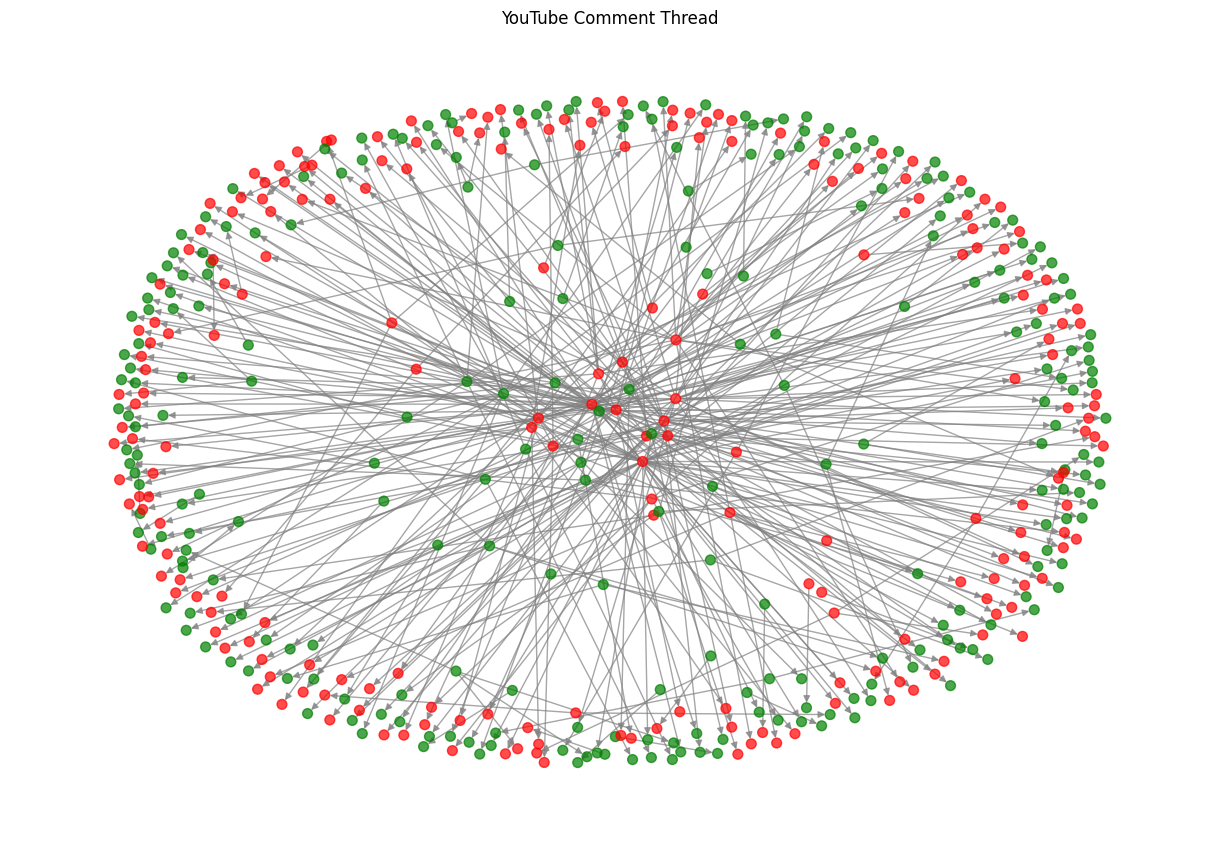

In [5]:
def get_color(s):
    return "green" if s == 1 else "red" if s == 0 else "blue"


node_colors = [get_color(filtered_G.nodes[n]["sentiment"]) for n in filtered_G.nodes()]
node_sizes = [
    max(50, filtered_G.in_degree(n) * 20) for n in filtered_G.nodes()
] 

pos = nx.spring_layout(filtered_G, k=0.2, seed=42)

plt.figure(figsize=(12, 8))
nx.draw(
    filtered_G,
    pos,
    node_color=node_colors,
    node_size=node_sizes,
    with_labels=False,
    alpha=0.7,
    edge_color="gray",
)
plt.title("YouTube Comment Thread")
plt.show()